In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib import rc
%matplotlib inline

# 주피터 노트북 한글 설정
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# Load datasets
cancer = pd.read_csv('data/wdbc2.csv', header=None)

In [3]:
# column[0] = id, column[1] = malignity or benign
y = cancer[1]
x = cancer.drop([0,1], axis=1) # axis = 1 일 때 세로축 삭제

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
# 훈련세트 정확도, 테스트 정확도를 저장할 배열
training_accuracy = []
test_accuracy = []

In [6]:
# 1,3,5,7,9까지 n_neighbors를 적용
neighbors_setting = range(1,11,2)

In [7]:
for n_neighbors in neighbors_setting:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

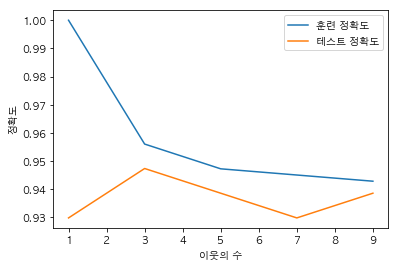

In [8]:
plt.plot(neighbors_setting, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_setting, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("이웃의 수")
plt.legend()